In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {'value' : [0,1,1,2,3,5,8,13,21,34,55,89,144]}
df = pd.DataFrame(data=data)
df

,value
0,0
1,1
2,1
3,2
4,3
5,5
6,8
7,13
8,21
9,34


29


<AxesSubplot:>

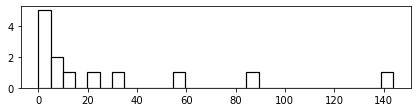

In [3]:
data_range = df['value'].max() - df['value'].min()
num_bins = np.ceil(data_range/5).astype(int)
print(num_bins) # 29
df['value'].hist(bins=num_bins, color='w', edgecolor='black', linewidth=1.2, grid=False, figsize=(7,1.5))

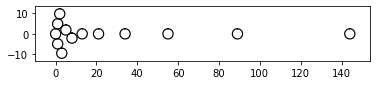

In [4]:
# vizmath (modified) beeswarm chart
from vizmath.beeswarm import swarm
from math import pi
data = {
    'id' : [str(i) for i in range(1, 14)],
    'value' : [0,1,1,2,3,5,8,13,21,34,55,89,144]
}
df = pd.DataFrame(data=data)
bs = swarm(df, 'id', 'value', None, size_override=pi*(5/2)**2)
bs.beeswarm_plot(color=False)

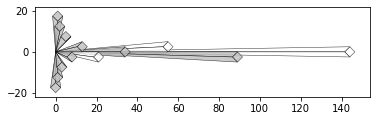

In [5]:
from vizmath.crystal_bar_chart import crystals
data = {
    'id' : [str(i) for i in range(1, 14)],
    'value' : [0,1,1,2,3,5,8,13,21,34,55,89,144]
}
df = pd.DataFrame(data=data)
cbc = crystals(df, 'id', 'value', 5, width_override=5, rotation=90)
cbc.cbc_plot(legend=False, alternate_color=True, color=False)

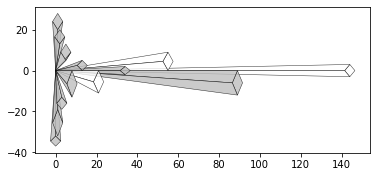

In [6]:
# vizmath crystal bar chart with added width property
from vizmath.crystal_bar_chart import crystals
data = {
    'id' : [str(i) for i in range(1, 14)],
    'value' : [0,1,1,2,3,5,8,13,21,34,55,89,144],
    'size' : [5,13,8,7,6,8,13,5,11,4,9,12,6] # new size property
}
df = pd.DataFrame(data=data)
cbc = crystals(df, 'id', 'value', 5, width_field='size', rotation=90)
cbc.cbc_plot(legend=False, alternate_color=True, color=False)

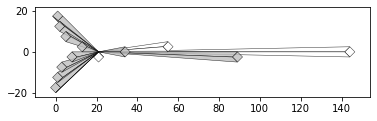

In [7]:
from vizmath.crystal_bar_chart import crystals
data = {
    'id' : [str(i) for i in range(1, 14)],
    'value' : [0,1,1,2,3,5,8,13,21,34,55,89,144]
}
df = pd.DataFrame(data=data)
cbc = crystals(df, 'id', 'value', 5, width_override=5,
    rotation=90, offset=21) # new offset
cbc.cbc_plot(legend=False, alternate_color=True, color=False)

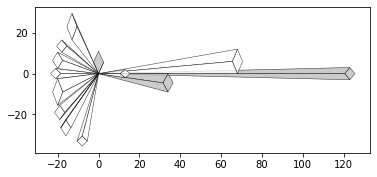

In [8]:
import pandas as pd
from vizmath.crystal_bar_chart import crystals # pip install vizmath==0.0.14

# using the example data from above:
data = {
    'id' : [str(i) for i in range(1, 14)],
    'value' : [0,1,1,2,3,5,8,13,21,34,55,89,144],
    'size' : [5,13,8,7,6,8,13,5,11,4,9,12,6]
}
df = pd.DataFrame(data=data)

# create a crystals object
#   > df: DataFrame with 1 numerical column of data and an
#     optional size column 'width_field'
#   > id_field: required identifier (can be dummy values)
#   > height_field: required value column
#   > height_range: sequential differential clustering threshold
#   > width_field = optional size column
#   > bottom_up: False = descending, True = ascending
#   > width_override: value constant to set the size value
#     (overrides the width_field values)
#   > offset: value to adjust the origin by
#   > reset_origin: False = keeps offset, True: resets origin with offset
#   > rotation: overall rotation around the center in degrees
cbc = crystals(df, 'id', 'value', 5, width_field='size', bottom_up = True, 
    width_override = None, offset=21, reset_origin=True, rotation=90)

#plot the Crystal Bar Chart
cbc.cbc_plot(legend=False, alternate_color=True, color=False)

In [9]:
# Cyrtsal Bar Chart DataFrame
cbc.o_crystal_bar_chart.df[['id', 'group', 'side',
    'value', 'height', 'width', 'x', 'y', 'path']].head()

,id,group,side,value,height,width,x,y,path
0,1,0,0,-21,5,5,-21.0,2.500000e+00,0
1,1,0,0,-21,5,5,-18.5,-1.132798e-15,1
2,1,0,0,-21,5,5,-21.0,-2.500000e+00,2
3,1,0,0,-21,5,5,-23.5,-1.438960e-15,3
4,1,0,0,-21,5,5,-21.0,2.500000e+00,4


In [10]:
import pandas as pd

# https://en.wikipedia.org/wiki/List_of_diamonds (as of 12/25/2023)
# filtered to enries with uncut and cut values with only 1 cut, >200 carats
diamonds = {
    'Name' : [
        '4 February Stone', 'Centenary Diamond', 'Cross of Asia',
        'DeBeers Diamond', 'Earth Star Diamond', 'Golden Jubilee Diamond',
        'Graff Lesedi La Rona', 'Great Mogul Diamond', 'Gruosi Diamond',
        'Incomparable Diamond', 'Jubilee Diamond', 'Koh-i-Noor',
        'Lesotho Brown', 'Lesotho Promise', 'Millennium Star',
        'Premier Rose Diamond', 'Regent Diamond', 'Taylor-Burton Diamond',
        'Tiffany Yellow Diamond'],
    'Uncut' : [
        404.2, 599, 280, 440, 248.9, 755.5, 1111, 780, 300.12, 
        890, 650.8, 793, 601, 603, 777, 353.9, 410, 241, 280],
    'Cut' : [
        163.41, 273.85, 79.12, 234.5, 111.59, 545.67, 302.37, 280, 115.34,
        407.48, 245.3, 105.6, 71.73, 75, 203.04, 137, 140.64, 68, 128.54],
    'Color' : [
        'white', 'colorless', 'yellow', '-', 'brown', 'yellow-brown',
        'colourless', '-', 'black', 'brownish-yellow', 'colorless',
        'colorless', 'pale brown', 'colorless', 'colorless',
        'colorless', 'white with pale blue', 'colorless', 'yellow'],
    'Origin' : [
        'Angola', 'South Africa', 'South Africa', 'South Africa',
        'South Africa', 'South Africa', 'Botswana', 'India', 'India',
        'Democratic Republic of Congo', 'South Africa', 'India', 'Lesotho',
        'Lesotho', 'Democratic Republic of Congo', 'South Africa', 'India',
        'South Africa', 'South Africa']
    }

df = pd.DataFrame(data=diamonds)

from vizmath.crystal_bar_chart import crystals
cbc = crystals(df, 'Name', 'Uncut', 100, width_field='Cut') # calculate
cbc.o_crystal_bar_chart.dataframe_rescale(0, 5000, -2500, 2500) #rescale
cbc.to_csv('crystal_bar_chart') # crystal bar chart output
cbc.df.to_csv('data.csv') # original data